<div>
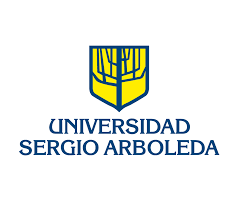<br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Ana Carolina Rodriguez Cediel
<br>
<i><b>Asignatura:</b></i> Introducción a la bioingeniería
<br>
<i><b>Estudiante:</b></i> Luis Rodriguez y Santiago Niño
<br>
<i><b>Tema:</b></i> Visualización de signos vitales y extración de parámetros clíncos reales.
<br>
<i><b>Fecha:</b></i> 20 de abril del 2024
<br>
</FONT>
</div>

#**1) Instrucciones**

1.   Buscar y descargar las bases de datos "The BIDMC dataset is a dataset of electrocarfiogram (ECG), pulse oximetry (photoplethysmogram, PPG) and impedance pneumography respiratory signals acquired from intensive care patients" y Wrist PPG During Exercise"
2.   Caracterizar las bases de datos, mostrando las variables más sobresalientes, verificar los tipos de pacientes y clasificarlos.
3.   A partir del dataset generar una interfáz donde se pueda visualizar todos los signos vitales y extraer parámetros clínicos reales.





#**2) Introducción**

Este conjunto de datos contiene señales y números extraídos de la base de datos de formas de onda coincidentes MIMIC II , mucho más grande , junto con anotaciones de respiración manuales realizadas a partir de dos anotadores, utilizando la señal respiratoria de impedancia.

#**3) Recopilación de datos**

Los datos originales se adquirieron de pacientes críticamente enfermos durante la atención hospitalaria en el Centro Médico Beth Israel Deaconess (Boston, MA, EUA). Dos anotadores anotaron manualmente las respiraciones individuales en cada grabación utilizando la señal respiratoria de impedancia. Las 53 grabaciones dentro del conjunto de datos, cada una de 8 minutos de duración, contienen cada una:

*   Señales fisiológicas, como el PPG, la señal respiratoria de impedancia y el electrocardiograma (ECG). Estos se muestrean a 125 Hz.
*   Parámetros fisiológicos, como la frecuencia cardíaca (HC), la frecuencia respiratoria (Resp) y el nivel de saturación de oxígeno en sangre (SpO2). Estos se muestrean a 1 Hz.
*   Parámetros fijos, como edad y sexo.
*   Anotaciones manuales de respiraciones.

Este conjunto de datos se informó por primera vez en la publicación mencionada, en la que los datos se utilizaron para evaluar el rendimiento de diferentes algoritmos para estimar la frecuencia respiratoria a partir de la señal de oximetría de pulso o fotopletismograma (PPG).








#**4) Archivos de información**

Formato CSV

Se proporcionan archivos CSV separados para cada grabación (donde ## es el número del sujeto), que contienen:



*   bidmc_##_Breaths.csv: anotaciones de respiración manuales
*   bidmc_##_Signals.csv: señales fisiológicas
*   bidmc_##_Numerics.csv: parámetros fisiológicos
*   bidmc_##_Fix.txt: Variables fijas










#**5) Procedimiento**

##**5.1) Importación librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import re
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import HTML

##5.2) Buscar y descargar las bases de datos BIDMC

##5.3) Cargar la base de datos mediante google drive


In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1o976PmREPBiXqdVTpgXxD-1oxNHTA5V_'
output = 'archivo_descargado.zip'
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1o976PmREPBiXqdVTpgXxD-1oxNHTA5V_
From (redirected): https://drive.google.com/uc?id=1o976PmREPBiXqdVTpgXxD-1oxNHTA5V_&confirm=t&uuid=848b8168-8fe6-450c-a2bb-5a7322277f42
To: /content/archivo_descargado.zip
100%|██████████| 40.2M/40.2M [00:01<00:00, 33.2MB/s]


'archivo_descargado.zip'

In [3]:
!unzip archivo_descargado.zip

Archive:  archivo_descargado.zip
   creating: bidmc_csv/
  inflating: bidmc_csv/bidmc_53_Numerics.csv  
  inflating: bidmc_csv/bidmc_29_Fix.txt  
  inflating: bidmc_csv/bidmc_51_Numerics.csv  
  inflating: bidmc_csv/bidmc_52_Numerics.csv  
  inflating: bidmc_csv/bidmc_52_Breaths.csv  
  inflating: bidmc_csv/bidmc_52_Fix.txt  
  inflating: bidmc_csv/bidmc_53_Breaths.csv  
  inflating: bidmc_csv/bidmc_51_Fix.txt  
  inflating: bidmc_csv/bidmc_51_Breaths.csv  
  inflating: bidmc_csv/bidmc_50_Breaths.csv  
  inflating: bidmc_csv/bidmc_50_Numerics.csv  
  inflating: bidmc_csv/bidmc_48_Breaths.csv  
  inflating: bidmc_csv/bidmc_53_Fix.txt  
  inflating: bidmc_csv/bidmc_49_Breaths.csv  
  inflating: bidmc_csv/bidmc_47_Fix.txt  
  inflating: bidmc_csv/bidmc_49_Numerics.csv  
  inflating: bidmc_csv/bidmc_48_Fix.txt  
  inflating: bidmc_csv/bidmc_46_Breaths.csv  
  inflating: bidmc_csv/bidmc_46_Numerics.csv  
  inflating: bidmc_csv/bidmc_41_Fix.txt  
  inflating: bidmc_csv/bidmc_47_Numerics.csv 

##5.4) Crear el dataframe

In [4]:
def combine_patient_data(patient_id, directory):
    data = {}
    for file_type in ['Breaths', 'Fix', 'Numerics', 'Signals']:
        filename = f"bidmc_{patient_id}_{file_type}"
        if file_type == 'Fix':
            data[file_type] = pd.read_csv(os.path.join(directory, f"{filename}.txt"), sep='\t')
        else:
            data[file_type] = pd.read_csv(os.path.join(directory, f"{filename}.csv"))

    return data

##5.6) Implementación de funciones

In [5]:
def visualize_patient_data(patient_data):
    # Acceder a los DataFrames individuales y mostrar sus datos
    print("Breaths Data:")
    print(patient_data['Breaths'].head())
    print()

    print("Fix Data:")
    print(patient_data['Fix'].head(10))
    print()

    print("Numerics Data:")
    print(patient_data['Numerics'].head())
    print()

    print("Signals Data:")
    print(patient_data['Signals'].head())
    print()


In [6]:
def explore_and_visualize_patient_data(patient_id, directory):
    patient_data = combine_patient_data(patient_id, directory)

    # Agregar visualización de los datos de paciente
    print("\nVisualización de los datos del paciente:")
    visualize_patient_data(patient_data)

    # Realiza el describe de las señales de respiración manuales
    print("\nDescripción de las señales de respiración manuales:")
    print(patient_data['Breaths'].describe())

    print(f"\nVisualización de los parámetros fisiológicos: {patient_id}\n")
    plot_numerics_data(patient_data['Numerics'])
    # Realiza el describe de los datos numéricos
    print("\nDescripción de los datos numéricos:")
    print(patient_data['Numerics'].describe())

    print(f"\nVisualización de las señales fisiológicas del paciente: {patient_id}\n")
    plot_individual_signals(patient_data['Signals'])
    # Realiza el describe de las señales fisiológicas
    print("\nDescripción de las señales fisiológicas:")
    print(patient_data['Signals'].describe().to_string(index=False))

    return patient_data['Numerics']

In [7]:
def explore_and_visualize_patient_data2(patient_id, directory):
    patient_data = combine_patient_data(patient_id, directory)

    return patient_data['Numerics']

In [8]:
def plot_data_distributions(combined_data, columns_to_plot_numerics=11, columns_to_plot_signals=11):
  """
  Plots the distributions of specified columns from two DataFrames in a combined plot.

  Args:
      combined_data (dict): A dictionary containing two DataFrames, 'Numerics' and 'Signals'.
      columns_to_plot_numerics (int, optional): The number of columns to plot from the 'Numerics' DataFrame. Defaults to 12.
      columns_to_plot_signals (int, optional): The number of columns to plot from the 'Signals' DataFrame. Defaults to 11.
  """

  # Set plot style
  sns.set_style('whitegrid')

  # Create a figure with adjusted rows and columns
  fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

  # Choose and apply a color palette
  palette = sns.color_palette("deep")
  sns.set_palette(palette)

  # -------- Plot distributions for 'Numerics' table --------
  for i, column in enumerate(combined_data['Numerics'].columns[:columns_to_plot_numerics]):
    sns.histplot(data=combined_data['Numerics'], x=column, kde=True, legend=True, ax=axs[i // 4, i % 4])
    axs[i // 4, i % 4].set_title(f"Distribution of {column} in Numerics", fontsize=10)
    axs[i // 4, i % 4].tick_params(bottom=False, labelsize=8)

  # -------- Plot distributions for 'Signals' table --------
  start_index = len(combined_data['Numerics'].columns[:columns_to_plot_numerics])
  for i, column in enumerate(combined_data['Signals'].columns[:columns_to_plot_signals]):
    sns.histplot(data=combined_data['Signals'], x=column, kde=True, legend=True, ax=axs[(i // 4) + 1, i % 4])
    axs[(i // 4) + 1, i % 4].set_title(f"Distribution of {column} in Signals", fontsize=10)
    axs[(i // 4) + 1, i % 4].tick_params(bottom=False, labelsize=8)

  # Additional customization (optional)
  plt.tight_layout()

  plt.show()

In [9]:
def plot_numerics_data(numerics_data):
    # Colores específicos para cada señal
    colors = ['red', 'blue', 'green', 'orange']

    # Plot all signals together
    plt.figure(figsize=(12, 4))
    for i, signal in enumerate([' HR', ' PULSE', ' RESP', ' SpO2']):
        plt.plot(numerics_data['Time [s]'], numerics_data[signal], label=signal, color=colors[i])

    plt.xlabel('Time [s]')
    plt.ylabel('Value')
    plt.title('Physiological Signals')
    plt.xlim(0, 480)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot each signal separately
    for signal, color in zip([' HR', ' PULSE', ' RESP', ' SpO2'], colors):
        plt.figure(figsize=(12, 4))
        plt.plot(numerics_data['Time [s]'], numerics_data[signal], color=color)
        plt.xlabel('Time [s]')
        plt.ylabel('Value')
        plt.title(f'{signal} Signal')
        plt.xlim(0, 480)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [10]:
def plot_individual_signals(signals_data):
    for col in signals_data.columns[1:]:
        plt.figure(figsize=(15, 4))
        plt.plot(signals_data['Time [s]'], signals_data[col])
        plt.xlabel('Time [s]')
        plt.ylabel(col)
        plt.title(f'{col} Signal')
        plt.xlim(0, 7)
        plt.grid(True)
        plt.show()
        print('\n')

In [11]:
def extract_age_gender(fix_data):
    age = None
    gender = None

    for index, row in fix_data.iterrows():
        for item in row:
            match_age = re.match(r'Age:\s*(\d+)', item)
            match_gender = re.match(r'Gender:\s*(\w)', item)
            if match_age:
                age = match_age.group(1)
            elif match_gender:
                gender = match_gender.group(1)

    return age, gender

In [12]:
def classify_patient(patient_data, patient_id):
    numerics_clasificados = classify_patient(patient_data, patient_id)
    print(numerics_clasificados)

In [13]:
def classify_patient(patient_data, patient_id, age, gender):
    # Calcular los promedios de las variables fisiológicas
    promedios = patient_data.mean()

    promedios = patient_data.mean().round(2)

    # Definir rangos de valores normales para cada variable
    rangos_normales = {
        'HR': (60, 100),
        'PULSE': (60, 100),
        'RESP': (12, 20),
        'SpO2': (90, 100)
    }

    # Imprimir los valores promedio de cada variable fisiológica y sus rangos normales
    print("")
    print(f"Datos del paciente {patient_id}:")
    print(f"Edad: {age}")
    print(f"Género: {gender}")
    print(f"Promedio de variables fisiológicas:")
    print(f"HR (Frecuencia Cardíaca): {promedios[' HR']} - Valores normales: {rangos_normales['HR']}")
    print(f"PULSE (Pulso): {promedios[' PULSE']} - Valores normales: {rangos_normales['PULSE']}")
    print(f"RESP (Respiración): {promedios[' RESP']} - Valores normales: {rangos_normales['RESP']}")
    print(f"SpO2 (Saturación de Oxígeno): {promedios[' SpO2']} - Valores normales: {rangos_normales['SpO2']}")

    if (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] < 12 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 1: Bradicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] > 100 and promedios[' PULSE'] > 100 and promedios[' RESP'] > 20 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 2: Taquicardia, Taquipnea, Baja SpO2'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] < 12 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 3: Bradicardia, Bradipnea, SpO2 Normal'
    elif (promedios[' HR'] > 100 and promedios[' PULSE'] > 100 and promedios[' RESP'] < 12 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 4: Taquicardia, SpO2 Normal'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] > 20 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 5: Bradicardia, Taquipnea, SpO2 Normal'
    elif (promedios[' HR'] >= 60 and promedios[' HR'] <= 100 and promedios[' PULSE'] >= 60 and promedios[' PULSE'] <= 100 \
        and promedios[' RESP'] >= 12 and promedios[' RESP'] <= 20 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 6: Valores Normales'
    elif (promedios[' HR'] >= 60 and promedios[' HR'] <= 100 and promedios[' PULSE'] >= 60 and promedios[' PULSE'] <= 100 \
        and promedios[' RESP'] > 20 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 7: Taquipnea, SpO2 Normal'
    elif (promedios[' HR'] >= 60 and promedios[' HR'] <= 100 and promedios[' PULSE'] >= 60 and promedios[' PULSE'] <= 100 \
        and promedios[' RESP'] < 12 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 8: Bradipnea, SpO2 Normal'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] > 20 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 9: Bradicardia, Taquipnea, Baja SpO2'
    elif (promedios[' HR'] > 100 and promedios[' PULSE'] > 100 and promedios[' RESP'] < 12 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 10: Taquicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] > 100 and promedios[' PULSE'] > 100 and promedios[' RESP'] > 20 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 11: Taquicardia, Taquipnea, SpO2 Normal'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] < 12 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 12: Bradicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] >= 90 and promedios[' HR'] <= 110 and promedios[' PULSE'] >= 90 and promedios[' PULSE'] <= 110 \
        and promedios[' RESP'] >= 15 and promedios[' RESP'] <= 25 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 13: HR y Pulso Normales, Respiración Normal, SpO2 Normal'
    elif (promedios[' HR'] >= 60 and promedios[' HR'] <= 90 and promedios[' PULSE'] >= 60 and promedios[' PULSE'] <= 90 \
        and promedios[' RESP'] >= 12 and promedios[' RESP'] <= 18 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 14: HR y Pulso Normales, Respiración Normal, SpO2 Normal'
    elif (promedios[' HR'] < 70 and promedios[' PULSE'] < 70 and promedios[' RESP'] > 18 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 15: Bradicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] > 120 and promedios[' PULSE'] > 120 and promedios[' RESP'] > 25 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 16: Taquicardia, Taquipnea, Baja SpO2'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] < 15 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 17: Bradicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] > 100 and promedios[' PULSE'] > 100 and promedios[' RESP'] < 15 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 18: Taquicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] > 20 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 19: Bradicardia, Taquipnea, SpO2 Normal'
    elif (promedios[' HR'] > 120 and promedios[' PULSE'] > 120 and promedios[' RESP'] < 15 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 20: Taquicardia, Bradipnea, SpO2 Normal'
    else:
        tipo = 'No se puede clasificar: Datos insuficientes'

    # Imprimir el tipo de clasificación
    print(f"Diagnóstico médico del paciente {patient_id}: {tipo}")
    return tipo

In [14]:
def classify_patient_2(patient_data, patient_id, age, gender):
    # Calcular los promedios de las variables fisiológicas
    promedios = patient_data.mean()

    promedios = patient_data.mean().round(2)

    # Definir rangos de valores normales para cada variable
    rangos_normales = {
        'HR': (60, 100),
        'PULSE': (60, 100),
        'RESP': (12, 20),
        'SpO2': (90, 100)
    }

    # Imprimir los valores promedio de cada variable fisiológica y sus rangos normales
    print("")
    print(f"Datos del paciente {patient_id}:")
    print(f"Edad: {age}")
    print(f"Género: {gender}")
    print(f"Promedio de variables fisiológicas:")
    print(f"HR (Frecuencia Cardíaca): {promedios[' HR']} - Valores normales: {rangos_normales['HR']}")
    print(f"PULSE (Pulso): {promedios[' PULSE']} - Valores normales: {rangos_normales['PULSE']}")
    print(f"RESP (Respiración): {promedios[' RESP']} - Valores normales: {rangos_normales['RESP']}")
    print(f"SpO2 (Saturación de Oxígeno): {promedios[' SpO2']} - Valores normales: {rangos_normales['SpO2']}")

    if (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] < 12 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 1: Bradicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] > 100 and promedios[' PULSE'] > 100 and promedios[' RESP'] > 20 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 2: Taquicardia, Taquipnea, Baja SpO2'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] < 12 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 3: Bradicardia, Bradipnea, SpO2 Normal'
    elif (promedios[' HR'] > 100 and promedios[' PULSE'] > 100 and promedios[' RESP'] < 12 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 4: Taquicardia, SpO2 Normal'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] > 20 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 5: Bradicardia, Taquipnea, SpO2 Normal'
    elif (promedios[' HR'] >= 60 and promedios[' HR'] <= 100 and promedios[' PULSE'] >= 60 and promedios[' PULSE'] <= 100 \
        and promedios[' RESP'] >= 12 and promedios[' RESP'] <= 20 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 6: Valores Normales'
    elif (promedios[' HR'] >= 60 and promedios[' HR'] <= 100 and promedios[' PULSE'] >= 60 and promedios[' PULSE'] <= 100 \
        and promedios[' RESP'] > 20 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 7: Taquipnea, SpO2 Normal'
    elif (promedios[' HR'] >= 60 and promedios[' HR'] <= 100 and promedios[' PULSE'] >= 60 and promedios[' PULSE'] <= 100 \
        and promedios[' RESP'] < 12 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 8: Bradipnea, SpO2 Normal'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] > 20 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 9: Bradicardia, Taquipnea, Baja SpO2'
    elif (promedios[' HR'] > 100 and promedios[' PULSE'] > 100 and promedios[' RESP'] < 12 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 10: Taquicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] > 100 and promedios[' PULSE'] > 100 and promedios[' RESP'] > 20 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 11: Taquicardia, Taquipnea, SpO2 Normal'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] < 12 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 12: Bradicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] >= 90 and promedios[' HR'] <= 110 and promedios[' PULSE'] >= 90 and promedios[' PULSE'] <= 110 \
        and promedios[' RESP'] >= 15 and promedios[' RESP'] <= 25 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 13: HR y Pulso Normales, Respiración Normal, SpO2 Normal'
    elif (promedios[' HR'] >= 60 and promedios[' HR'] <= 90 and promedios[' PULSE'] >= 60 and promedios[' PULSE'] <= 90 \
        and promedios[' RESP'] >= 12 and promedios[' RESP'] <= 18 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 14: HR y Pulso Normales, Respiración Normal, SpO2 Normal'
    elif (promedios[' HR'] < 70 and promedios[' PULSE'] < 70 and promedios[' RESP'] > 18 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 15: Bradicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] > 120 and promedios[' PULSE'] > 120 and promedios[' RESP'] > 25 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 16: Taquicardia, Taquipnea, Baja SpO2'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] < 15 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 17: Bradicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] > 100 and promedios[' PULSE'] > 100 and promedios[' RESP'] < 15 and promedios[' SpO2'] < 90):
        tipo = 'Tipo 18: Taquicardia, Bradipnea, Baja SpO2'
    elif (promedios[' HR'] < 60 and promedios[' PULSE'] < 60 and promedios[' RESP'] > 20 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 19: Bradicardia, Taquipnea, SpO2 Normal'
    elif (promedios[' HR'] > 120 and promedios[' PULSE'] > 120 and promedios[' RESP'] < 15 and promedios[' SpO2'] >= 90):
        tipo = 'Tipo 20: Taquicardia, Bradipnea, SpO2 Normal'
    else:
        tipo = 'No se puede clasificar: Datos insuficientes'

    # Imprimir el tipo de clasificación
    print(f"Diagnóstico médico del paciente {patient_id}: {tipo}")

    # Construir el diccionario physiological_data
    physiological_data = {
        'HR (Frecuencia Cardíaca)': {
            'Valor promedio': promedios[' HR'],
            'Valores normales': rangos_normales['HR']
        },
        'PULSE (Pulso)': {
            'Valor promedio': promedios[' PULSE'],
            'Valores normales': rangos_normales['PULSE']
        },
        'RESP (Respiración)': {
            'Valor promedio': promedios[' RESP'],
            'Valores normales': rangos_normales['RESP']
        },
        'SpO2 (Saturación de Oxígeno)': {
            'Valor promedio': promedios[' SpO2'],
            'Valores normales': rangos_normales['SpO2']
        }
    }

    # Devolvemos la clasificación y los datos fisiológicos
    return tipo, physiological_data


In [15]:
# Define la función para extraer el número del paciente del nombre del archivo
def extract_patient_number(filename):
    return filename.split("_")[1]

In [16]:
def process_patient_files(directory):
    # Lista para almacenar los nombres de los archivos Fix.txt y Numerics.csv
    fix_files = []
    numeric_files = []

    # Recorre todos los archivos en el directorio y almacena los nombres de archivos Fix.txt y Numerics.csv
    for filename in os.listdir(directory):
        if filename.endswith("Fix.txt"):
            fix_files.append(filename)
        if filename.endswith("Numerics.csv"):
            numeric_files.append(filename)

    # Ordenar la lista de nombres de archivo Fix.txt por el número de paciente
    fix_files.sort(key=lambda x: extract_patient_number(x))

    # Ordenar la lista de nombres de archivo numérico por el número de paciente
    numeric_files.sort(key=lambda x: extract_patient_number(x))

    # Diccionario para almacenar el recuento de clasificaciones de pacientes
    classification_count = {}

    # Recorre la lista ordenada de nombres de archivo Fix.txt
    for fix_filename, numeric_filename in zip(fix_files, numeric_files):
        # Extrae el número del paciente del nombre del archivo Fix.txt
        patient_number = extract_patient_number(fix_filename)

        # Abre el archivo Fix.txt para obtener la información de edad y género
        with open(os.path.join(directory, fix_filename), 'r') as file:
            # Lee todas las líneas del archivo
            lines = file.readlines()
            # Busca la línea que contiene la información de edad
            age_line = next((line for line in lines if line.startswith('Age')), None)
            # Busca la línea que contiene la información de género
            gender_line = next((line for line in lines if line.startswith('Gender')), None)
            if age_line is None or gender_line is None:
                print(f"No se pudo encontrar información de edad o género en el archivo {fix_filename}.")
                continue
            # Extraer la edad y el género del paciente
            age_str = age_line.split(': ')[1].strip()
            if age_str == '90+':
                age = 90  # or you can handle it differently depending on your analysis
            else:
                try:
                    age = int(age_str)
                except ValueError:
                    print(f"Valor no válido para la edad en el archivo {fix_filename}: {age_str}")
                    continue
            gender = gender_line.split(': ')[1].strip()

        # Lee el archivo numerics.csv correspondiente al paciente y clasifica al paciente
        numerics_filepath = os.path.join(directory, numeric_filename)
        try:
            patient_data = pd.read_csv(numerics_filepath)
        except FileNotFoundError:
            print(f"No se pudo encontrar el archivo {numeric_filename}.")
            continue
        classification = classify_patient(patient_data, patient_number, age, gender)

        # Agregar al diccionario de recuento de clasificaciones
        if classification in classification_count:
            classification_count[classification] += 1
        else:
            classification_count[classification] = 1

    return classification_count

##5.5) Análisis exploratorio

In [17]:
# Definir el directorio donde se encuentran los archivos de datos
directory = '/content/bidmc_csv'

# Combinar los datos
combined_data = combine_patient_data(10, directory)

# Imprimir información de cada DataFrame
for file_type, df in combined_data.items():
    print("")
    print(f"DataFrame: {file_type}")
    print("-" * 60)  # Línea divisoria
    print("Información del DataFrame:")
    print("")
    print(df.info())


DataFrame: Breaths
------------------------------------------------------------
Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   breaths ann1 [signal sample no]   146 non-null    float64
 1    breaths ann2 [signal sample no]  152 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.5 KB
None

DataFrame: Fix
------------------------------------------------------------
Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   bidmc_10  14 non-null     object
dtypes: object(1)
memory usage: 240.0+ bytes
None

DataFrame: Numerics
------------------------------------------------------------
Información del DataFrame:


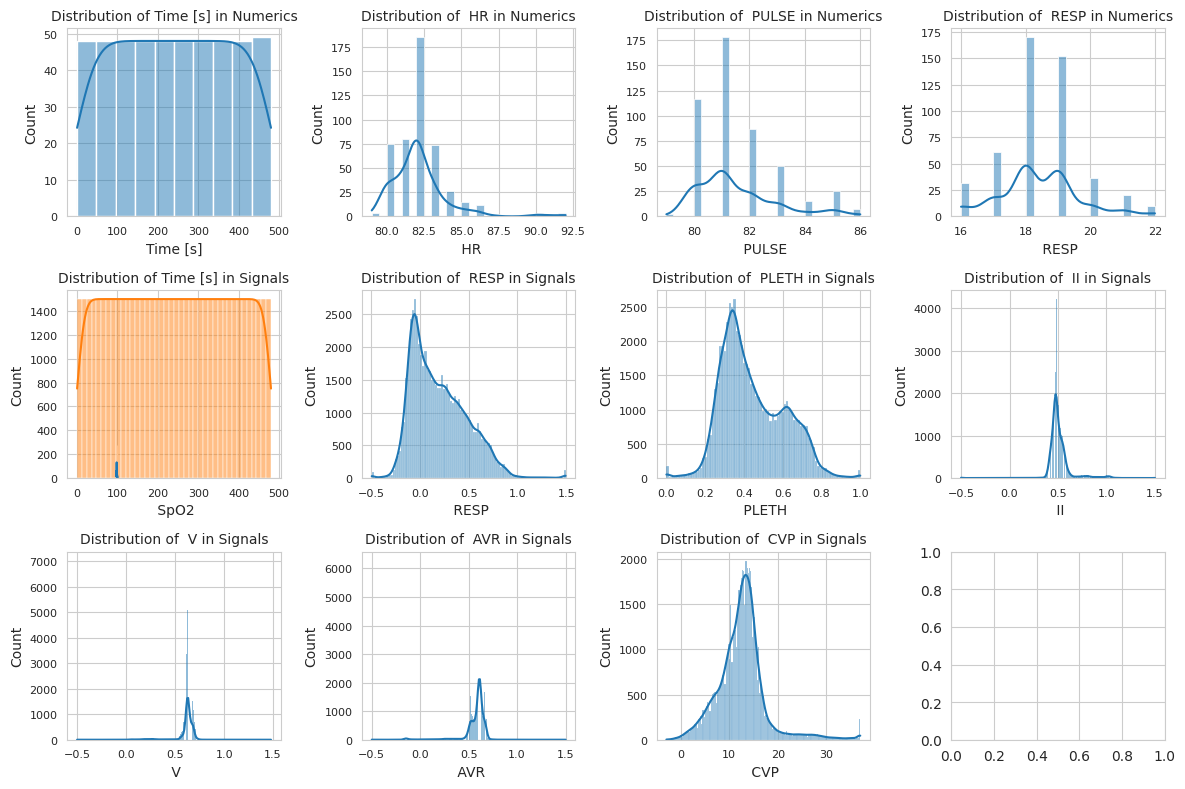

In [18]:
# Example usage (assuming 'combined_data' is defined elsewhere)
plot_data_distributions(combined_data)

##5.6) Análisis descriptivo

In [19]:
# Visualizar el número de filas de cada DataFrame
for df_name, df in combined_data.items():
    print(f"Número de filas en {df_name}: {len(df)}")

Número de filas en Breaths: 152
Número de filas en Fix: 14
Número de filas en Numerics: 481
Número de filas en Signals: 60001


###5.6.2) Tipos de pacientes y su clasificación

####5.6.2.1) Preprocesamiento de datos

In [20]:
# Iterar sobre todos los archivos
# Listas para almacenar la información de edad y género
ages = []
genders = []

# Iterar sobre todos los archivos
for file in os.listdir(directory):
    if file.endswith("_Fix.txt"):
        patient_id = file.split('_')[1]
        fix_path = os.path.join(directory, file)

        # Leer el archivo .fix y extraer la información de Age y Gender
        with open(fix_path, 'r') as f:
            fix_content = f.readlines()
        fix_data = pd.DataFrame({'bidmc_01': fix_content})

        # Crear un subDataFrame para extraer la información de Age y Gender
        sub_df = fix_data.iloc[:7]
        age, gender = extract_age_gender(sub_df)

        # Almacenar la información en las listas
        ages.append(age)
        genders.append(gender)

# Crear DataFrame a partir de las listas de edad y género
df = pd.DataFrame({'Age': ages, 'Gender': genders})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     52 non-null     object
 1   Gender  52 non-null     object
dtypes: object(2)
memory usage: 976.0+ bytes


In [22]:
df.describe()

,Age,Gender
count,52,52
unique,32,2
top,44,F
freq,4,32


In [23]:
# Convertir la columna 'Age' a tipo numérico
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Primero, vamos a calcular la media de la columna 'Age' y redondearla a un número entero
age_mean = round(df['Age'].mean())

# Luego, encontramos la categoría 'Gender' que más se repite
gender_mode = df['Gender'].mode()[0]

# Ahora, imputamos los valores faltantes en la columna 'Age' con la media redondeada
# y en la columna 'Gender' con la categoría que más se repite
df['Age'].fillna(age_mean, inplace=True)
df['Gender'].fillna(gender_mode, inplace=True)

# Convertir la columna 'Age' a tipo entero
df['Age'] = df['Age'].astype(int)

# Verificamos que no haya más valores faltantes en el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     53 non-null     int64 
 1   Gender  53 non-null     object
dtypes: int64(1), object(1)
memory usage: 976.0+ bytes


####5.6.2.1) Análisis descriptivo

In [24]:
df['Age'].unique()

array([71, 74, 50, 51, 44, 88, 64, 85, 77, 75, 26, 76, 73, 78, 52, 72, 90,
       56, 43, 57, 86, 37, 29, 70, 81, 46, 48, 65, 19, 67, 61, 69])

In [25]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [26]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
F    33
M    20
Name: count, dtype: int64

#####5.6.2.2.1) Gráfico de barras por género

In [27]:
# Crear el gráfico de barras
fig = go.Figure(go.Bar(
    x=gender_counts.index,  # Valores únicos en la columna 'Gender' (es decir, 'M' y 'F')
    y=gender_counts.values,  # Frecuencia de cada valor ('M' y 'F')
    marker_color=['blue', 'orange'],  # Color de las barras para hombres y mujeres respectivamente
    width=0.4
))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Número de Hombres y Mujeres',
    xaxis_title='Género',
    yaxis_title='Número de Individuos'
)

# Mostrar el gráfico
fig.show()

#####5.6.2.2.2) Diagrama de caja por género

In [28]:
# Obtener los datos de pacientes por género y edad
data = df[['Gender', 'Age']]

# Diccionario para asignar colores
color_map = {'M': 'orange', 'F': 'blue'}

# Crear el diagrama de caja
fig = go.Figure()

# Agregar los diagramas de caja para cada género
for gender in data['Gender'].unique():
    if gender in color_map:
        ages = data[data['Gender'] == gender]['Age']
        ages_sorted = sorted(ages, reverse=False)  # Ordenar las edades de manera descendente
        fig.add_trace(go.Box(y=ages_sorted, name=gender, marker_color=color_map[gender]))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Distribución de Edad por Género',
    xaxis_title='Género',
    yaxis_title='Edad',
)

# Mostrar el gráfico
fig.show()

#####5.6.2.2.3) Diagrama de recuento de pacientes por género y edad

In [29]:
# Calcular el recuento de pacientes por género y edad
genders_by_age = df.groupby(['Gender', 'Age']).size().unstack(fill_value=0)

# Crear el gráfico de barras
fig = go.Figure()

# Definir el tamaño de las barras
bar_width = 0.8

# Agregar barras para el género masculino
fig.add_trace(go.Bar(name='M', x=genders_by_age.columns, y=genders_by_age.loc['M'], marker_color='orange', width=bar_width))

# Agregar barras para el género femenino, utilizando el parámetro base para apilarlas
fig.add_trace(go.Bar(name='F', x=genders_by_age.columns, y=genders_by_age.loc['F'], marker_color='blue', width=bar_width, base=genders_by_age.loc['M']))

# Actualizar el diseño del gráfico
fig.update_layout(
    barmode='relative',  # Modo de apilamiento relativo
    title='Distribución de Edad por Género',
    xaxis_title='Edad',
    yaxis_title='Número de Pacientes'
)

# Mostrar el gráfico
fig.show()


##5.7)  Información médica de los pacientes por número

###5.7.1) Visualización médica del paciente por número

Ingrese el número del paciente: 18

Visualización de los datos del paciente:
Breaths Data:
   breaths ann1 [signal sample no]   breaths ann2 [signal sample no]
0                               76                                82
1                              502                               499
2                              911                               926
3                             1328                              1343
4                             1750                              1755

Fix Data:
                                            bidmc_18
0                   Signals: PLETH; RESP; II; V; AVR
1                 Signals sampling frequency: 125 Hz
2                    Numerics: HR; PULSE; RESP; SpO2
3                  Numerics sampling frequency: 1 Hz
4                                           Age: NaN
5                                          Gender: ?
6                                     Location: micu
7                    MIMIC II matched wdb ID: s09483
8      

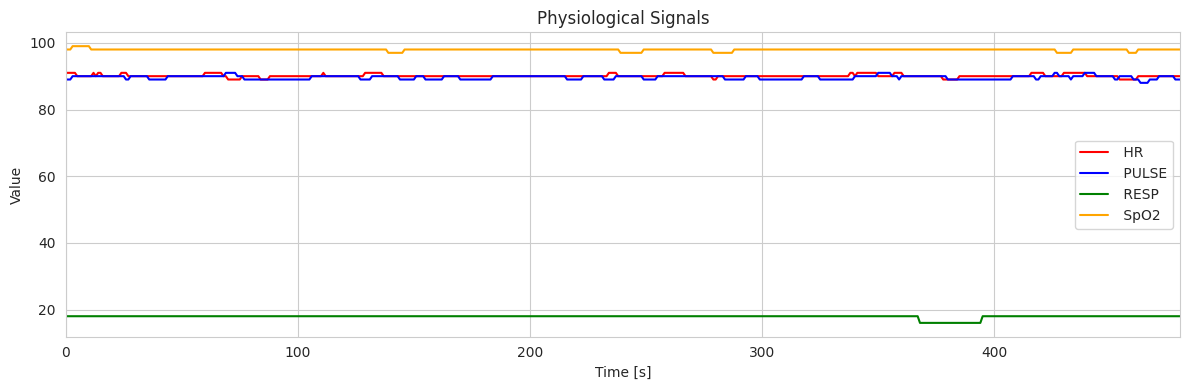

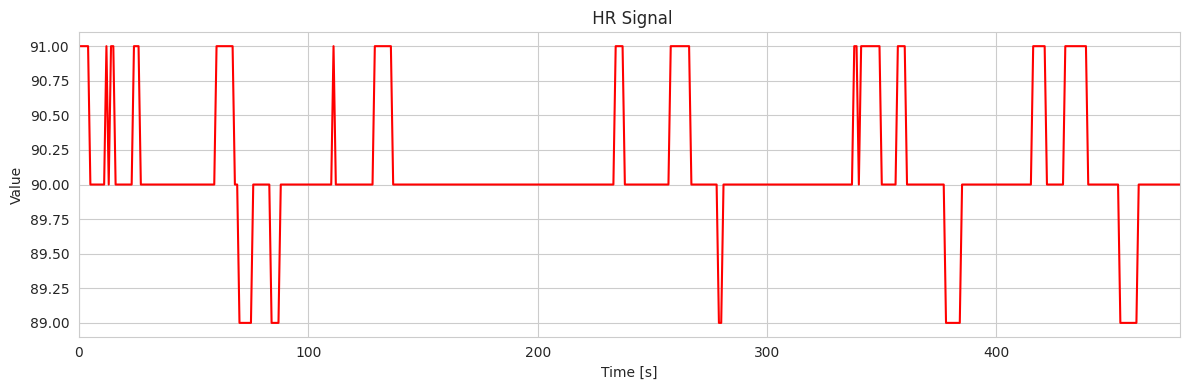

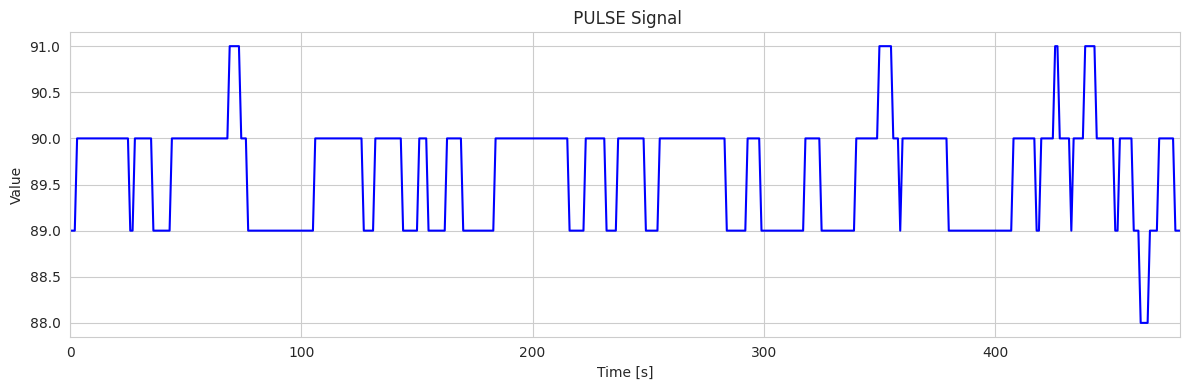

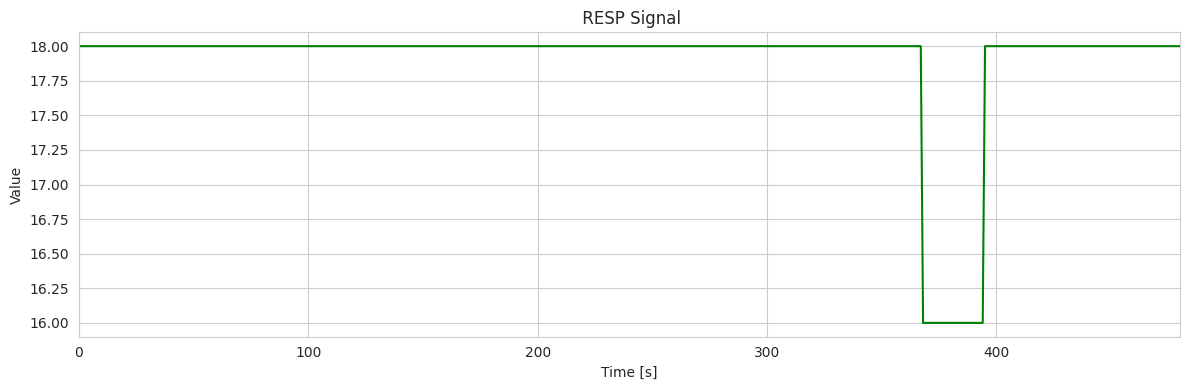

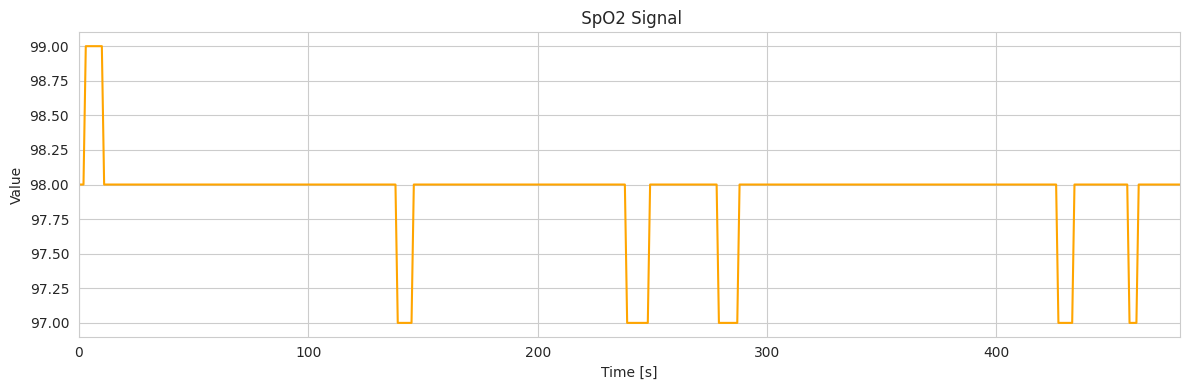


Descripción de los datos numéricos:
         Time [s]          HR       PULSE        RESP        SpO2
count  481.000000  481.000000  481.000000  481.000000  481.000000
mean   240.000000   90.093555   89.644491   17.887734   97.939709
std    138.997002    0.444386    0.566804    0.460836    0.300179
min      0.000000   89.000000   88.000000   16.000000   97.000000
25%    120.000000   90.000000   89.000000   18.000000   98.000000
50%    240.000000   90.000000   90.000000   18.000000   98.000000
75%    360.000000   90.000000   90.000000   18.000000   98.000000
max    480.000000   91.000000   91.000000   18.000000   99.000000

Visualización de las señales fisiológicas del paciente: 18



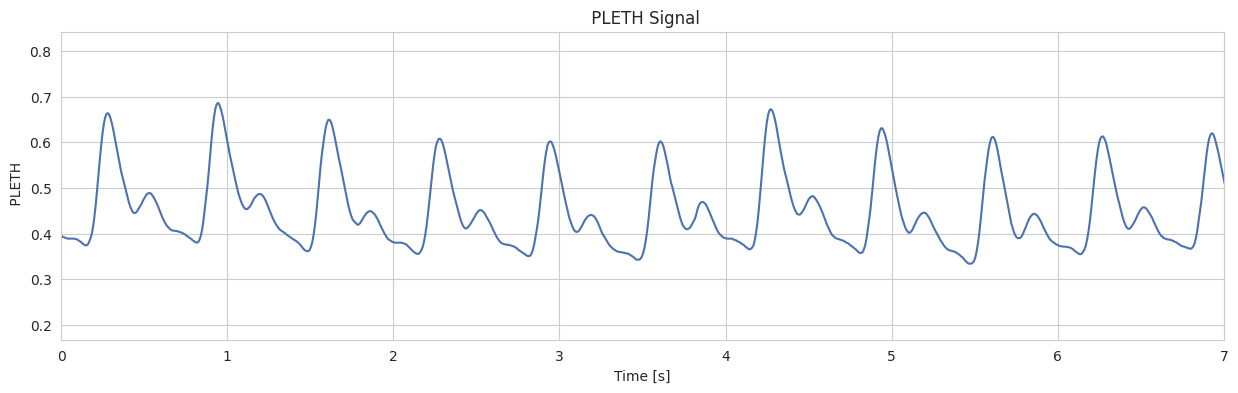

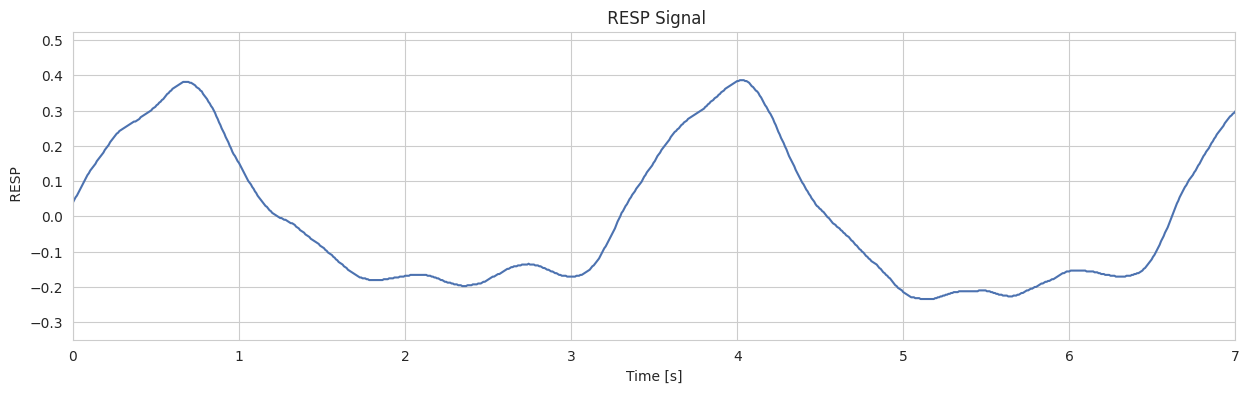

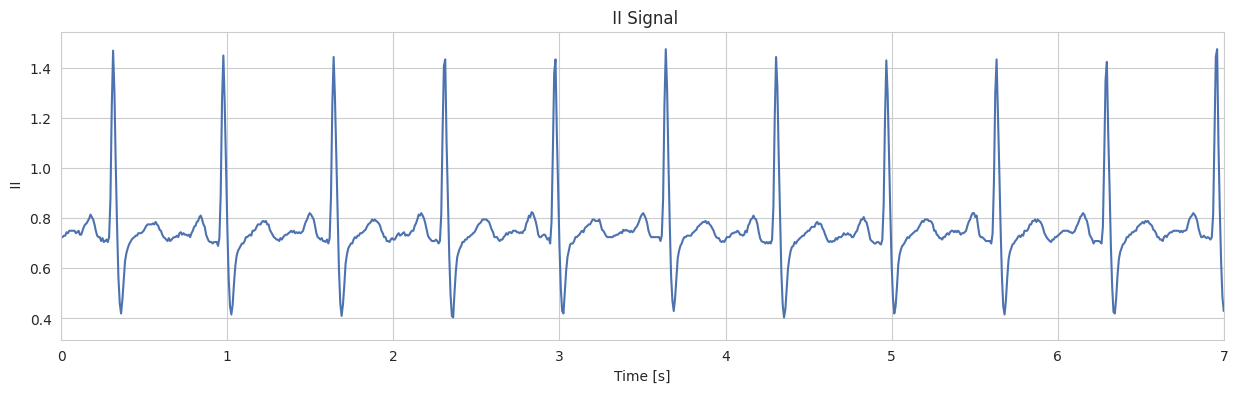

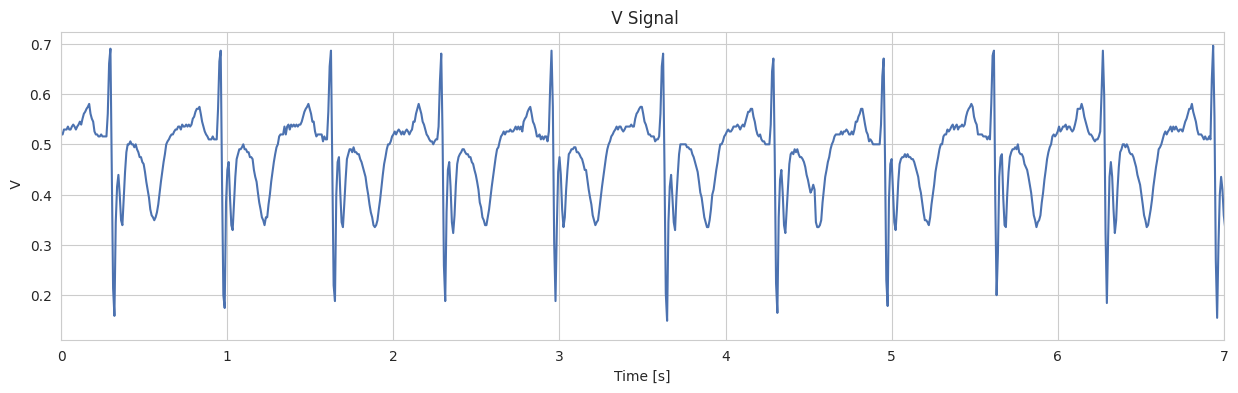

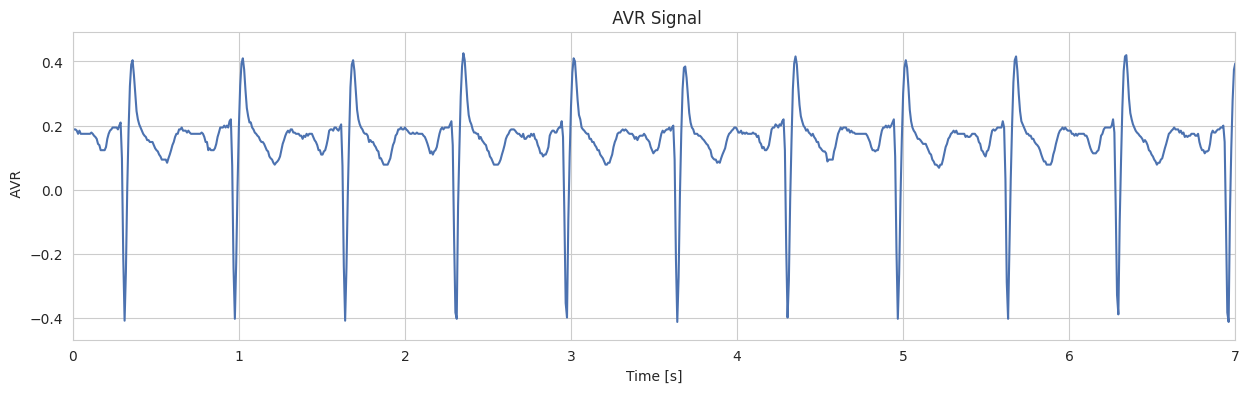




Descripción de las señales fisiológicas:
    Time [s]        PLETH         RESP           II            V          AVR
60001.000000 60001.000000 60001.000000 60001.000000 60001.000000 60001.000000
  240.000000     0.437088     0.003735     0.752950     0.478445     0.151818
  138.567529     0.094078     0.199687     0.137745     0.080115     0.107400
    0.000000     0.198440    -0.310510     0.371090     0.139220    -0.423530
  120.000000     0.369500    -0.163810     0.714840     0.435290     0.123530
  240.000000     0.414470    -0.092910     0.740230     0.500000     0.168630
  360.000000     0.478980     0.171150     0.775390     0.529410     0.188240
  480.000000     0.811340     0.484110     1.488300     0.696080     0.449020


In [30]:
# Solicitar al usuario el número del paciente
patient_id = input("Ingrese el número del paciente: ")

# Definir el directorio donde se encuentran los archivos de datos
d1irectory = '/content/bidmc_csv'

# Explorar y isualizar datos del paciente
patient_data = explore_and_visualize_patient_data(patient_id, directory)

###5.7.2) Clasificación del paciente por número

###5.7.3) Clasificación y diagnostico de todos los pacientes

In [31]:
# Llamada a la función para procesar los archivos en un directorio específico
classification_results = process_patient_files(directory)


Datos del paciente 01:
Edad: 88
Género: M
Promedio de variables fisiológicas:
HR (Frecuencia Cardíaca): 91.32 - Valores normales: (60, 100)
PULSE (Pulso): 91.01 - Valores normales: (60, 100)
RESP (Respiración): 21.44 - Valores normales: (12, 20)
SpO2 (Saturación de Oxígeno): 96.92 - Valores normales: (90, 100)
Diagnóstico médico del paciente 01: Tipo 7: Taquipnea, SpO2 Normal

Datos del paciente 02:
Edad: 65
Género: M
Promedio de variables fisiológicas:
HR (Frecuencia Cardíaca): 91.07 - Valores normales: (60, 100)
PULSE (Pulso): 90.66 - Valores normales: (60, 100)
RESP (Respiración): 15.35 - Valores normales: (12, 20)
SpO2 (Saturación de Oxígeno): 99.99 - Valores normales: (90, 100)
Diagnóstico médico del paciente 02: Tipo 6: Valores Normales

Datos del paciente 03:
Edad: 46
Género: F
Promedio de variables fisiológicas:
HR (Frecuencia Cardíaca): 76.64 - Valores normales: (60, 100)
PULSE (Pulso): 75.89 - Valores normales: (60, 100)
RESP (Respiración): 17.64 - Valores normales: (12, 20)

In [32]:
# Imprimir el diccionario de recuento de clasificaciones de pacientes
print("Recuento de clasificaciones de pacientes:")
for classification, count in classification_results.items():
    print(f"{classification}: {count}")

Recuento de clasificaciones de pacientes:
Tipo 7: Taquipnea, SpO2 Normal: 5
Tipo 6: Valores Normales: 33
Tipo 8: Bradipnea, SpO2 Normal: 3
No se puede clasificar: Datos insuficientes: 7
Tipo 13: HR y Pulso Normales, Respiración Normal, SpO2 Normal: 4


###5.7.4) Visualización clasificación de pacientes por tipo de diagnóstico

In [33]:
# Convertir el diccionario en un DataFrame para facilitar el trazado
classification_df = pd.DataFrame({"Classification": list(classification_results.keys()), "Count": list(classification_results.values())})

# Graficar la cantidad de pacientes clasificados
fig = px.bar(classification_df, x="Classification", y="Count", title="Cantidad de pacientes clasificados",
             labels={"Classification": "Tipo"}, color="Classification", color_discrete_sequence=px.colors.qualitative.Set1,  text="Count")
fig.update_yaxes(title_text="Número de pacientes")
fig.show()

###5.7.5) Visualización clasificación de pacientes por tipo de diagnóstico, edad y género

In [34]:
# Agregar una columna de índice para ambos DataFrames utilizando .loc
classification_df.loc[:, "Index"] = classification_df.index
data.loc[:, "Index"] = data.index

# Combinar los DataFrames mediante unirlos en la columna de índice
combined_df = pd.merge(data, classification_df, on="Index", how="left")

# Graficar la cantidad de pacientes clasificados por género, edad y tipo
fig = px.bar(combined_df, x="Gender", y="Age", color="Classification", title="Cantidad de pacientes clasificados por género, edad y tipo",
             labels={"Gender": "Género", "Age": "Edad"}, barmode="group", text="Count")  # Agregar el conteo como texto
fig.update_layout(xaxis={'categoryorder':'total ascending'})  # Ordenar el eje x por total ascendente
fig.show()

<ipython-input-34-a6dce85ac70c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##5.8) Visualización interfáz gráfica

###5.8.1) Implementación de funciones

In [35]:
def generate_patient_data_html(data):
    html = "<html><head><style>"
    html += "body {font-family: Arial, sans-serif; background-color: white; color: #333;}"
    html += "h2 {color: #4CAF50; text-align: center;}"
    html += "table {width: 100%; border-collapse: collapse; margin-top: 20px;}"
    html += "th, td {padding: 12px; text-align: left; border-bottom: 1px solid #ddd;}"
    html += "th {background-color: #4CAF50; color: white;}"
    html += "tr:nth-child(even) {background-color: #f2f2f2;}"
    html += "tr:hover {background-color: #ddd;}"
    html += "</style></head><body>"
    html += "<div style='max-width: 800px; margin: 0 auto;'>"
    html += "<h2>Información de los pacientes del dataset</h2>"
    html += "<table><thead><tr><th colspan='2'>Datos del paciente</th></tr></thead><tbody>"

    for key, value in data.items():
        html += f"<tr><td colspan='2'><b>{key}</b></td></tr>"
        if isinstance(value, dict):
            for k, v in value.items():
                html += f"<tr><td>{k}</td><td>{v}</td></tr>"
        else:
            html += f"<tr><td colspan='2'>{value}</td></tr>"

    html += "</tbody></table></div></body></html>"

    return html

In [36]:
def process_patient_files_2(directory):
    # Lista para almacenar los nombres de los archivos Fix.txt y Numerics.csv
    fix_files = []
    numeric_files = []

    # Recorre todos los archivos en el directorio y almacena los nombres de archivos Fix.txt y Numerics.csv
    for filename in os.listdir(directory):
        if filename.endswith("Fix.txt"):
            fix_files.append(filename)
        if filename.endswith("Numerics.csv"):
            numeric_files.append(filename)

    # Ordenar la lista de nombres de archivo Fix.txt por el número de paciente
    fix_files.sort(key=lambda x: extract_patient_number(x))

    # Ordenar la lista de nombres de archivo numérico por el número de paciente
    numeric_files.sort(key=lambda x: extract_patient_number(x))

    # Diccionario para almacenar la información de todos los pacientes
    patients_info = {}

    # Recorre la lista ordenada de nombres de archivo Fix.txt
    for fix_filename, numeric_filename in zip(fix_files, numeric_files):
        # Extrae el número del paciente del nombre del archivo Fix.txt
        patient_number = extract_patient_number(fix_filename)

        # Abre el archivo Fix.txt para obtener la información de edad y género
        with open(os.path.join(directory, fix_filename), 'r') as file:
            # Lee todas las líneas del archivo
            lines = file.readlines()
            # Busca la línea que contiene la información de edad
            age_line = next((line for line in lines if line.startswith('Age')), None)
            # Busca la línea que contiene la información de género
            gender_line = next((line for line in lines if line.startswith('Gender')), None)
            if age_line is None or gender_line is None:
                print(f"No se pudo encontrar información de edad o género en el archivo {fix_filename}.")
                continue
            # Extraer la edad y el género del paciente
            age_str = age_line.split(': ')[1].strip()
            if age_str == '90+':
                age = 90  # or you can handle it differently depending on your analysis
            else:
                try:
                    age = int(age_str)
                except ValueError:
                    print(f"Valor no válido para la edad en el archivo {fix_filename}: {age_str}")
                    continue
            gender = gender_line.split(': ')[1].strip()

        # Lee el archivo numerics.csv correspondiente al paciente y clasifica al paciente
        numerics_filepath = os.path.join(directory, numeric_filename)
        try:
            patient_data = pd.read_csv(numerics_filepath)
        except FileNotFoundError:
            print(f"No se pudo encontrar el archivo {numeric_filename}.")
            continue
        classification, physiological_data = classify_patient_2(patient_data, patient_number, age, gender)

        # Agregar la información del paciente al diccionario
        patients_info[patient_number] = {
            'age': age,
            'gender': gender,
            'Physiological Data': physiological_data,
            'classification': classification
        }

    return patients_info

In [37]:
def classify_patient_htlm(patient_data, patient_id):
    if patient_id not in patient_data:
        return "<html><body><h2>No se encontraron datos para este paciente.</h2></body></html>"

    age = patient_data[patient_id]["age"]
    gender = patient_data[patient_id]["gender"]
    diagnosis = patient_data[patient_id]["classification"]
    physiological_data = patient_data[patient_id]["Physiological Data"]

    html = "<html><head><style>"
    html += "body {font-family: Arial, sans-serif; background-color: white; color: #333;}"
    html += "h2 {color: #4CAF50; text-align: center;}"
    html += "table {width: 100%; border-collapse: collapse; margin-top: 20px;}"
    html += "th, td {padding: 12px; text-align: center; border-bottom: 1px solid #ddd;}"
    html += "th {background-color: #4CAF50; color: white;}"
    html += "tr:nth-child(even) {background-color: #f2f2f2;}"
    html += "tr:hover {background-color: #ddd;}"
    html += ".container {max-width: 800px; margin: 0 auto;}"
    html += ".fixed-width {width: 400px;}"
    html += ".centered {text-align: center;}"
    html += "</style></head><body>"
    html += "<div class='container'>"
    html += f"<h2>Información del paciente {patient_id}:</h2>"
    html += "<table>"
    html += "<colgroup><col class='fixed-width'><col></colgroup>"
    html += f"<tr><td class='centered' colspan='2'>Edad:</td><td>{age}</td></tr>"
    html += f"<tr><td class='centered' colspan='2'>Género:</td><td>{gender}</td></tr>"
    html += "<tr><th colspan='3' style='text-align: center;'>Valores fisiológicos del paciente:</th></tr>"
    html += "<tr><th>Variable</th><th>Valor promedio</th><th>Rango normal</th></tr>"

    for key, value in physiological_data.items():
        value_promedio = value['Valor promedio']
        valores_normales = value['Valores normales']
        html += f"<tr><td>{key}</td><td>{value_promedio}</td><td>({valores_normales[0]} - {valores_normales[1]})</td></tr>"

    html += "<tr><th colspan='3'>Diagnóstico médico del paciente:</th></tr>"
    html += f"<tr><td colspan='3'>{diagnosis}</td></tr>"
    html += "</table></div></body></html>"

    return html


###5.8.2) Visualización clasificación de pacientes por tipo de diagnósitco del conjunto de datos

In [38]:
# Datos de pacientes (reemplazar con tus datos reales)
patient_data = classification_results

# Generar HTML
html_content = generate_patient_data_html(patient_data)

# Guardar el HTML en un archivo
with open("patient_data.html", "w") as file:
    file.write(html_content)

In [39]:
from IPython.display import HTML

HTML(html_content)

Datos del paciente
"Tipo 7: Taquipnea, SpO2 Normal"
5
Tipo 6: Valores Normales
33
"Tipo 8: Bradipnea, SpO2 Normal"
3
No se puede clasificar: Datos insuficientes
7
"Tipo 13: HR y Pulso Normales, Respiración Normal, SpO2 Normal"
4


In [40]:
classification_results = process_patient_files_2(directory)


Datos del paciente 01:
Edad: 88
Género: M
Promedio de variables fisiológicas:
HR (Frecuencia Cardíaca): 91.32 - Valores normales: (60, 100)
PULSE (Pulso): 91.01 - Valores normales: (60, 100)
RESP (Respiración): 21.44 - Valores normales: (12, 20)
SpO2 (Saturación de Oxígeno): 96.92 - Valores normales: (90, 100)
Diagnóstico médico del paciente 01: Tipo 7: Taquipnea, SpO2 Normal

Datos del paciente 02:
Edad: 65
Género: M
Promedio de variables fisiológicas:
HR (Frecuencia Cardíaca): 91.07 - Valores normales: (60, 100)
PULSE (Pulso): 90.66 - Valores normales: (60, 100)
RESP (Respiración): 15.35 - Valores normales: (12, 20)
SpO2 (Saturación de Oxígeno): 99.99 - Valores normales: (90, 100)
Diagnóstico médico del paciente 02: Tipo 6: Valores Normales

Datos del paciente 03:
Edad: 46
Género: F
Promedio de variables fisiológicas:
HR (Frecuencia Cardíaca): 76.64 - Valores normales: (60, 100)
PULSE (Pulso): 75.89 - Valores normales: (60, 100)
RESP (Respiración): 17.64 - Valores normales: (12, 20)

###5.8.3) Interfáz información de los pacientes por id

In [41]:
from ipywidgets import widgets, interact
from IPython.display import display, HTML

def classify_patient_htlm(patient_data, patient_id):
    if patient_id not in patient_data:
        return "<html><body><h2>No se encontraron datos para este paciente.</h2></body></html>"

    age = patient_data[patient_id]["age"]
    gender = patient_data[patient_id]["gender"]
    diagnosis = patient_data[patient_id]["classification"]
    physiological_data = patient_data[patient_id]["Physiological Data"]

    html = "<html><head><style>"
    html += "body {font-family: Arial, sans-serif; background-color: white; color: #333;}"
    html += "h2 {color: #4CAF50; text-align: center;}"
    html += "table {width: 100%; border-collapse: collapse; margin-top: 20px;}"
    html += "th, td {padding: 12px; text-align: center; border-bottom: 1px solid #ddd;}"
    html += "th {background-color: #4CAF50; color: white;}"
    html += "tr:nth-child(even) {background-color: #f2f2f2;}"
    html += "tr:hover {background-color: #ddd;}"
    html += ".container {max-width: 800px; margin: 0 auto;}"
    html += ".fixed-width {width: 400px;}"
    html += ".centered {text-align: center;}"
    html += "</style></head><body>"
    html += "<div class='container'>"
    html += f"<h2>Información del paciente {patient_id}:</h2>"
    html += "<table>"
    html += "<colgroup><col class='fixed-width'><col></colgroup>"
    html += f"<tr><td class='centered' colspan='2'>Edad:</td><td>{age}</td></tr>"
    html += f"<tr><td class='centered' colspan='2'>Género:</td><td>{gender}</td></tr>"
    html += "<tr><th colspan='3' style='text-align: center;'>Valores fisiológicos del paciente:</th></tr>"
    html += "<tr><th>Variable</th><th>Valor promedio</th><th>Rango normal</th></tr>"

    for key, value in physiological_data.items():
        value_promedio = value['Valor promedio']
        valores_normales = value['Valores normales']
        html += f"<tr><td>{key}</td><td>{value_promedio}</td><td>({valores_normales[0]} - {valores_normales[1]})</td></tr>"

    html += "<tr><th colspan='3'>Diagnóstico médico del paciente:</th></tr>"
    html += f"<tr><td colspan='3'>{diagnosis}</td></tr>"
    html += "</table></div></body></html>"

    return html

def on_button_clicked(b):
    patient_id = text.value
    html_content = classify_patient_htlm(classification_results, patient_id)
    output.clear_output()
    with output:
        display(HTML(html_content))
        patient_numerics_data = explore_and_visualize_patient_data2(patient_id, directory)
        plot_numerics_data(patient_numerics_data)

In [42]:
# Crear widgets
text = widgets.Text(placeholder='Ingrese ID del paciente', description='ID Paciente:', style={'description_color': '#4CAF50'})
button = widgets.Button(description="Buscar", style={'button_color': '#4CAF50'})
output = widgets.Output()

# Agregar función al evento del botón
button.on_click(on_button_clicked)

# Mostrar widgets
display(text, button, output)

Text(value='', description='ID Paciente:', placeholder='Ingrese ID del paciente')

Button(description='Buscar', style=ButtonStyle(button_color='#4CAF50'))

Output()